In [ ]:
!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import math
import pandas_datareader as wdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

In [ ]:
df=wdr.DataReader('GOOG',data_source='yahoo',start='2012-01-01',end='2020-11-01')
df

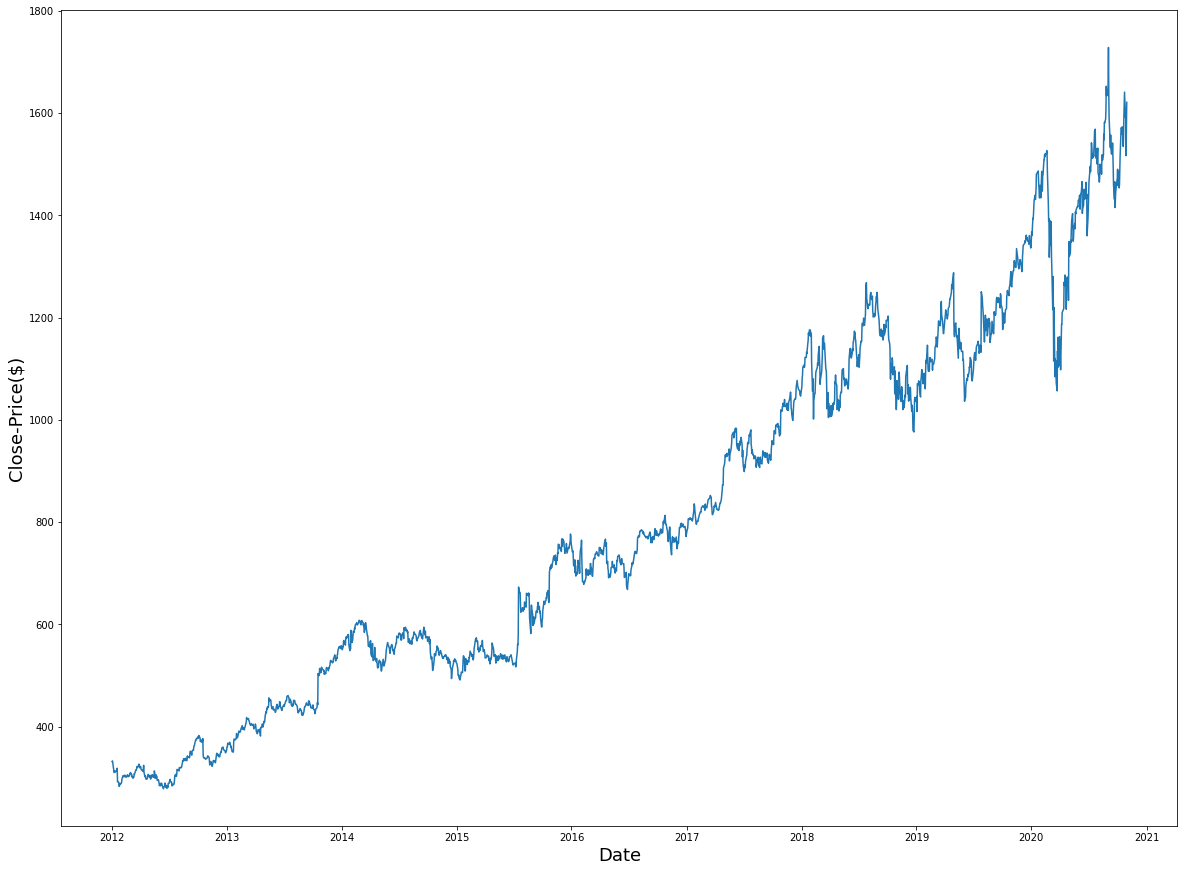

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close-Price($)',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
closings=data.values
trl=math.ceil(len(closings)*0.7)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaledvals=scaler.fit_transform(closings)


In [ ]:
scaledvals

In [ ]:
train_data=scaledvals[0:trl,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
x_train.shape,y_train.shape

((1497, 60), (1497,))

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1497, 60, 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

In [ ]:
test_data=scaledvals[trl-60:,:]
x_test=[]
y_test=closings[trl:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test.shape

(666, 60)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
np.sqrt(np.mean(predictions-y_test)**2)

41.70199749920819

In [ ]:
train_set=data[:trl]
valid_set=data[trl:]
valid_set['predictions']=predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


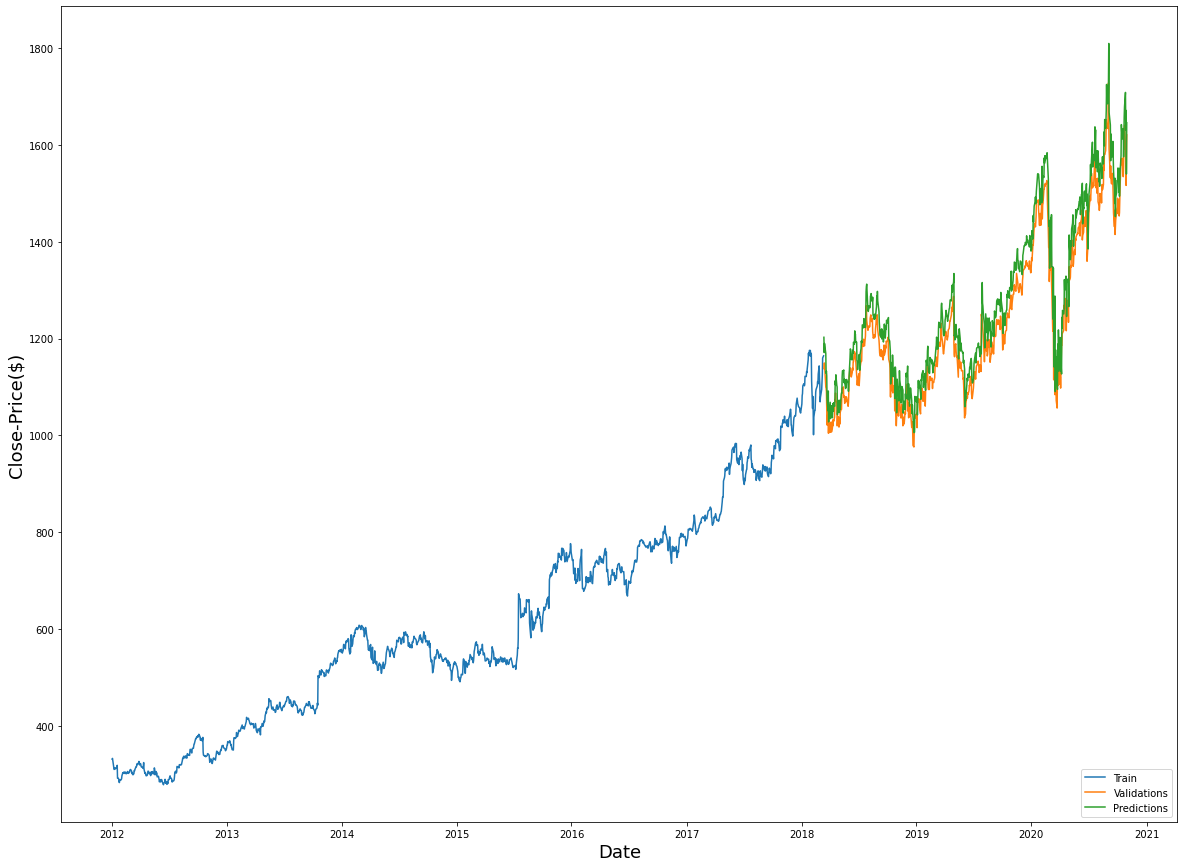

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(train_set['Close'])
plt.plot(valid_set[['Close','predictions']])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close-Price($)',fontsize=18)
plt.legend(['Train','Validations','Predictions'],loc='lower right')
plt.show()

In [ ]:
tdf=wdr.DataReader('GOOG',data_source='yahoo',start='2012-01-01',end='2020-11-01')
ntdf=tdf.filter(['Close'])
pd60=ntdf[-60:].values
pds60=scaler.transform(pd60)
x60_test=[]
x60_test.append(pds60)
x60_test=np.array(x60_test)
x60_test=np.reshape(x60_test,(x60_test.shape[0],x60_test.shape[1],1))
price=model.predict(x60_test)
price=scaler.inverse_transform(price)
print(price)

[[1688.573]]


In [ ]:
wdr.DataReader('GOOG',data_source='yahoo',start='2020-11-02',end='2020-11-02')['Close']

Date
2020-11-02    1626.030029
Name: Close, dtype: float64